In [57]:
# install matplotlib_venn
import sys
!{sys.executable} -m pip install matplotlib_venn

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sb

sb.set_theme()

%store -r final_data
%store -r hierar_countries
%store -r kmeans_countries

hierar_df = hierar_countries.copy()
kmeans_df = kmeans_countries.copy()

In [59]:
# Hierar_countries
print("Hierar countries: ")
print(hierar_df['country'])

Hierar countries: 
4                                Angola
18                                Benin
26                         Burkina Faso
27                              Burundi
29                             Cambodia
30                             Cameroon
32             Central African Republic
33                                 Chad
45     Democratic Republic of the Congo
53                    Equatorial Guinea
54                              Eritrea
56                             Ethiopia
68                               Guinea
70                                Haiti
85                                Kenya
89     Lao People's Democratic Republic
93                              Liberia
98                           Madagascar
99                               Malawi
102                                Mali
113                          Mozambique
114                             Myanmar
117                               Nepal
121                               Niger
128                  

In [60]:
# Hierar_countries
print("Kmeans countries: ")
print(kmeans_df['country'])

Kmeans countries: 
0                           Afghanistan
4                                Angola
18                                Benin
20     Bolivia (Plurinational State of)
26                         Burkina Faso
27                              Burundi
29                             Cambodia
30                             Cameroon
32             Central African Republic
33                                 Chad
37                              Comoros
38                                Congo
45     Democratic Republic of the Congo
47                             Djibouti
53                    Equatorial Guinea
54                              Eritrea
56                             Ethiopia
61                               Gambia
64                                Ghana
68                               Guinea
70                                Haiti
85                                Kenya
86                             Kiribati
89     Lao People's Democratic Republic
92                   

In [61]:
union = pd.Series(np.union1d(kmeans_df['country'], hierar_df['country']))
intersection = pd.Series(np.intersect1d(kmeans_df['country'], hierar_df['country']))
notcommon = union[~union.isin(intersection)]

print("Countries that are not common to the clusters from the 2 models: ")
print(notcommon)

Countries that are not common to the clusters from the 2 models: 
0                          Afghanistan
3     Bolivia (Plurinational State of)
10                             Comoros
11                               Congo
13                            Djibouti
17                              Gambia
18                               Ghana
22                            Kiribati
24                             Lesotho
29                          Mauritania
30    Micronesia (Federated States of)
31                            Mongolia
36                             Nigeria
37                            Pakistan
40                             Senegal
42                     Solomon Islands
45                               Sudan
46                           Swaziland
47                          Tajikistan
51                          Uzbekistan
52                             Vanuatu
53                               Yemen
dtype: object


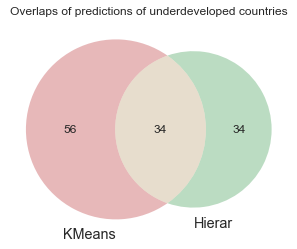

In [62]:
plt.title("Overlaps of predictions of underdeveloped countries")
venn2(subsets = (kmeans_df['country'].size, hierar_df['country'].size, intersection.size), set_labels = ('KMeans', 'Hierar'))

In [63]:
# let's examine the countries in the intersection
df = final_data[final_data['country'].isin(intersection)]

In [64]:
df.shape

(34, 17)

In [65]:
df.head()

,GDP per capita (current US$),Economy: Agriculture (% of GVA),Agricultural production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),Population growth rate (average annual %),Urban population (% of total population),Infant mortality rate (per 1000 live births,Mobile-cellular subscriptions (per 100 inhabitants),Energy supply per capita (Gigajoules),country,Region,Average labour force participation,Average life expectancy,Average pop. using improved drinking water,Average Education: Primary gross enrol,Health expenditure per capita
5,4714.1,6.8,175,21011.0,8790.0,3.5,44.1,65.4,60.8,25,Angola,MiddleAfrica,68.45,60.20,51.80,128.65,155.5653
21,779.1,23.2,152,410.0,2630.0,2.8,44.0,67.7,85.6,17,Benin,WesternAfrica,71.70,59.95,78.65,128.95,35.8386
32,611.1,34.5,131,2019.0,3699.0,3.0,29.9,64.8,80.6,9,Burkina Faso,WesternAfrica,83.50,58.65,86.65,88.00,30.555
33,244.6,36.3,109,123.0,625.0,3.0,12.1,77.8,46.2,6,Burundi,EasternAfrica,83.65,56.10,82.45,123.80,18.345
35,1158.7,28.2,175,13204.0,15313.0,1.6,20.7,29.9,133.0,17,Cambodia,South-easternAsia,81.30,67.55,84.55,116.65,66.0459


<AxesSubplot:xlabel='GDP per capita (current US$)', ylabel='country'>

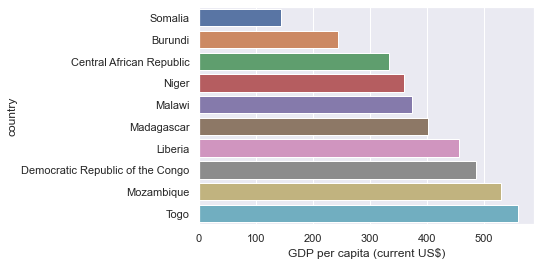

In [66]:
COL = "GDP per capita (current US$)"
pt = df[['country',COL]].sort_values(COL, ascending = True).head(10)
sb.barplot(x="GDP per capita (current US$)", y="country", data=pt)